In [1]:
import pandas as pd

In [2]:
!pip install kaggle

In [3]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
  0% 0.00/163M [00:00<?, ?B/s]
100% 163M/163M [00:00<00:00, 1.89GB/s]


In [5]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
!is

/bin/bash: line 1: is: command not found


In [8]:
!ls

data  drive  face-mask-dataset.zip  kaggle.json  sample_data


In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [10]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2765.jpg', 'with_mask_3385.jpg', 'with_mask_3701.jpg', 'with_mask_1627.jpg', 'with_mask_318.jpg']
['with_mask_3069.jpg', 'with_mask_1092.jpg', 'with_mask_365.jpg', 'with_mask_371.jpg', 'with_mask_2029.jpg']


In [11]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2842.jpg', 'without_mask_2120.jpg', 'without_mask_3152.jpg', 'without_mask_3135.jpg', 'without_mask_257.jpg']
['without_mask_1920.jpg', 'without_mask_1683.jpg', 'without_mask_3463.jpg', 'without_mask_2803.jpg', 'without_mask_1928.jpg']


In [12]:
print('number of with mask',len(with_mask_files))
print('number of without mask',len(without_mask_files))

number of with mask 3725
number of without mask 3828


In [13]:
#creating labels for two class og images
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828


In [15]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [16]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [17]:
labels=with_mask_labels+without_mask_labels
print(len(labels))

7553


In [18]:
# convert images to numpy array

In [22]:
with_mask_path='/content/data/with_mask'

data=[]

for img_file in with_mask_files:
  image=Image.open('/content/data/with_mask/'+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)


without_mask_path='/content/data/without_mask'
# The data list is being overwritten here, so I'll append the images from the without_mask directory to the existing data list.
for img_file in without_mask_files:
  image=Image.open(without_mask_path+'/'+img_file) # Added a forward slash here
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [23]:
type(data)

list

In [24]:
len(data)

7553

array([[[ 91,  85,  53],
        [ 91,  85,  53],
        [ 91,  85,  53],
        ...,
        [101,  94,  65],
        [100,  93,  64],
        [100,  93,  64]],

       [[ 92,  86,  54],
        [ 92,  86,  54],
        [ 92,  86,  54],
        ...,
        [100,  93,  64],
        [100,  93,  64],
        [100,  93,  64]],

       [[ 94,  88,  56],
        [ 94,  88,  56],
        [ 94,  88,  56],
        ...,
        [100,  93,  64],
        [ 99,  92,  63],
        [ 99,  92,  63]],

       ...,

       [[125, 136, 156],
        [154, 166, 185],
        [151, 162, 180],
        ...,
        [144, 159, 180],
        [134, 148, 169],
        [123, 138, 159]],

       [[113, 125, 147],
        [ 69,  80, 102],
        [ 92, 101, 123],
        ...,
        [164, 177, 197],
        [118, 131, 150],
        [144, 157, 176]],

       [[107, 119, 141],
        [121, 133, 155],
        [ 89, 101, 123],
        ...,
        [135, 148, 167],
        [140, 153, 172],
        [155, 168, 187]]], dtype=uint8)
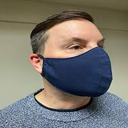

In [25]:
data[0]

In [26]:
data[0].shape

(128, 128, 3)

In [27]:
x=np.array(data)
y=np.array(labels)

In [28]:
print(x.shape)
print(y.shape)


(7553, 128, 128, 3)
(7553,)


In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [31]:
print(x_train.shape,x_test.shape,)

(6042, 128, 128, 3) (1511, 128, 128, 3)


In [32]:
# scaling the data
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [33]:
import tensorflow as tf
from tensorflow import keras

In [39]:
num_of_classes=2
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [42]:
history=model.fit(x_train_scaled,y_train,validation_split=0.1,epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 94s 540ms/step - accuracy: 0.6934 - loss: 0.7274 - val_accuracy: 0.9008 - val_loss: 0.2548
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 139s 527ms/step - accuracy: 0.8806 - loss: 0.3083 - val_accuracy: 0.9091 - val_loss: 0.2335
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 92s 541ms/step - accuracy: 0.9047 - loss: 0.2506 - val_accuracy: 0.9372 - val_loss: 0.1886
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 143s 545ms/step - accuracy: 0.9108 - loss: 0.2150 - val_accuracy: 0.9388 - val_loss: 0.1729
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 92s 541ms/step - accuracy: 0.9316 - loss: 0.1714 - val_accuracy: 0.9405 - val_loss: 0.1699


In [44]:
# model evaluation
loss,accuracy=model.evaluate(x_test_scaled,y_test)
print('Test Accuracy:',accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 156ms/step - accuracy: 0.9245 - loss: 0.2029
Test Accuracy: 0.9172733426094055


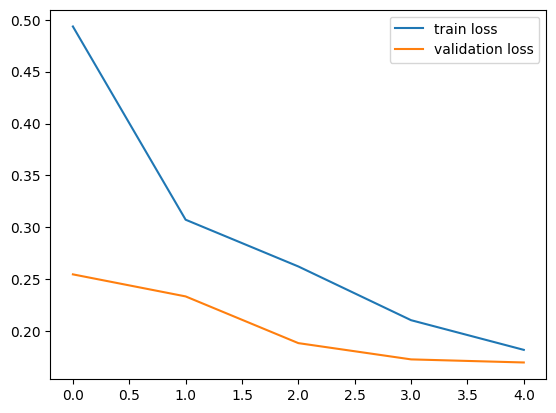

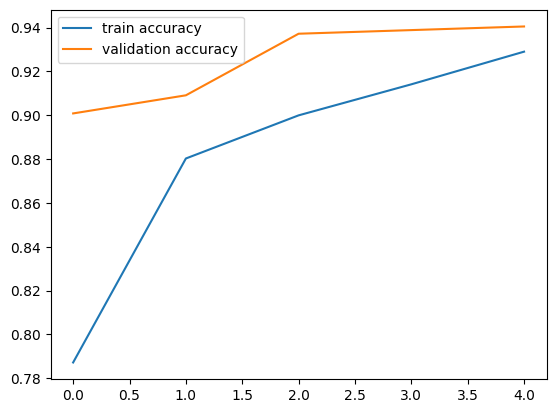

In [46]:
h=history
# plot the loss value
plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['accuracy'],label='train accuracy')
plt.plot(h.history['val_accuracy'],label='validation accuracy')
plt.legend()
plt.show()